In [1]:
# category and total number of articles
ARXIV_FIELDS = {
    # maths
    #"math": 10,
    # statistics
    #"stat": 10,
    # Computer Science
    #"cs": 2248,
    #"cs": 10,
    # Astrophysics
    #"astro-ph": 376,
    #"astro-ph": 10,
    # High Energy Physics - Experiment
    "hep-ex": 1000,
    # Quantum Physics
    #"quant-ph": 10,
    # Quantitative Biology
    #"q-bio": 10
}

In [2]:
ARXIV_BASE_URL = "https://arxiv.org/list/"
ARXIV_ABS_URL = "https://arxiv.org/abs/"
ARXIV_HTML_URL = "https://arxiv.org/html/"

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
def generate_arxiv_pages(fields):
    pages = {}

    for category, total_articles in fields.items():
        # Generating URLs based on the category and total number of articles
        category_pages = []
        #for skip in range(0, total_articles, 25):
        #    page = f"{ARXIV_BASE_URL}{category}/pastweek?skip={skip}&show=25"
        #    category_pages.append(page)
        page = f"{ARXIV_BASE_URL}{category}/2024-01?skip=0&show=2000"
        category_pages.append(page)
        pages[category] = category_pages

    return pages

In [5]:
arxiv_pages = generate_arxiv_pages(ARXIV_FIELDS)

In [6]:
total_pages = 0
for category, category_pages in arxiv_pages.items():
    print(f"{category}:")
    length = len(category_pages)
    print(length)
    total_pages += length
print("total pages: ", total_pages)

hep-ex:
1
total pages:  1


In [7]:
def extract_ids(html_content):
    # Parse HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all dl tags containing dt tags
    dl_tags = soup.find_all('dl')

    # List to store extracted IDs
    extracted_ids = []

    # Iterate through dl tags
    for dl_tag in dl_tags:
        # Find all dt tags within the current dl tag
        dt_tags = dl_tag.find_all('dt')

        # Iterate through dt tags
        for dt_tag in dt_tags:
            # find the a tag that contains also an href
            a_tag = dt_tag.find('a', attrs={'href': True}) 
            # Check if the a tag has a title containing "Abstract"
            if a_tag and a_tag.get('title', '').lower() == 'abstract':
                # Extract the 'href' attribute, which contains the ID
                href_attr = a_tag.get('href')

                # Extract the ID from the 'href' attribute
                id_value = href_attr.split('/')[-1]
                # Append the ID to the list
                extracted_ids.append(id_value)
                print(id_value)

    return extracted_ids

In [8]:
def scrape_articles_ids(page_url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(page_url)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Extract Ids
            return extract_ids(response.content)
        else:
            print(f"Failed to retrieve HTML content. Status code: {response.status_code}")
            return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [9]:
# count the number of articles with IDs
def get_articles_ids(pages_urls):
    articles_ids = {}
    for category, pages_urls in arxiv_pages.items():

        ids = []
        try:
            for page_url in pages_urls:
                ids += scrape_articles_ids(page_url)

                articles_ids[category] = ids
        except Exception as e:
          print(f"An error occurred: {e}")

        print(f"{len(ids)} IDs for {category}")

    return articles_ids

In [10]:
articles_ids = get_articles_ids(arxiv_pages)

Failed to retrieve HTML content. Status code: 403
An error occurred: 'NoneType' object is not iterable
0 IDs for hep-ex


In [11]:
total_ids = 0
for _, ids in articles_ids.items():
  total_ids += len(ids)

print(f"total number of articles: {total_ids}")

total number of articles: 0


In [12]:
import html2text
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist

# Download NLTK data files (only needed once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sabaterj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#url = 'https://arxiv.org/html/2407.12909'
def fetch_and_tokenize(url):
    # Fetch the HTML content
    response = requests.get(url)
    html_content = response.text

    # Convert HTML to plain text
    text_maker = html2text.HTML2Text()
    text_maker.ignore_links = True
    text = text_maker.handle(html_content)

    # Tokenize the text by words
    words = word_tokenize(text)
    return words


In [14]:
articles_ids.get('hep-ex')

In [15]:
# List of arXiv URLs
arxiv_urls = []
#for _, ids in articles_ids.items():
#    arxiv_urls.append(ARXIV_HTML_URL+ids[0])
subject = 'hep-ex'
#arxiv_urls = ARXIV_HTML_URL+articles_ids.get(subject)
[arxiv_urls.append(ARXIV_HTML_URL + s) for s in articles_ids.get(subject)]
#print(arxiv_urls)
all_words = []

TypeError: 'NoneType' object is not iterable

In [ ]:
print(len(arxiv_urls))
arxiv_urls[246]

247


'https://arxiv.org/html/2401.17990'

In [ ]:
for url in arxiv_urls:
    words = fetch_and_tokenize(url)
    all_words.extend(words)

# Output all tokenized words
#print(all_words)

In [ ]:
print(all_words[250])

respectively


In [ ]:
words = fetch_and_tokenize("https://arxiv.org/html/2407.14382")
words[-100:]


['#',
 'Error',
 '403',
 'Forbidden',
 'Forbidden',
 '#',
 '#',
 '#',
 'Error',
 '54113',
 'Details',
 ':',
 'cache-fra-eddf8230052-FRA',
 '1721659255',
 '894772564',
 '*',
 '*',
 '*',
 'Varnish',
 'cache',
 'server']

In [ ]:
#find the frequency of words
fdist = FreqDist(all_words)

#print the 10 most common words
fdist.most_common(10)

[(',', 77483),
 ('{', 76416),
 ('}', 76398),
 (')', 37887),
 ('(', 37876),
 ('.', 31579),
 ('the', 29305),
 ('start_POSTSUBSCRIPT', 17165),
 ('end_POSTSUBSCRIPT', 17113),
 (']', 16107)]

In [ ]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 8


[('error', 2), ('forbidden', 2), ('details', 1), ('varnish', 1), ('cache', 1), ('server', 1)]


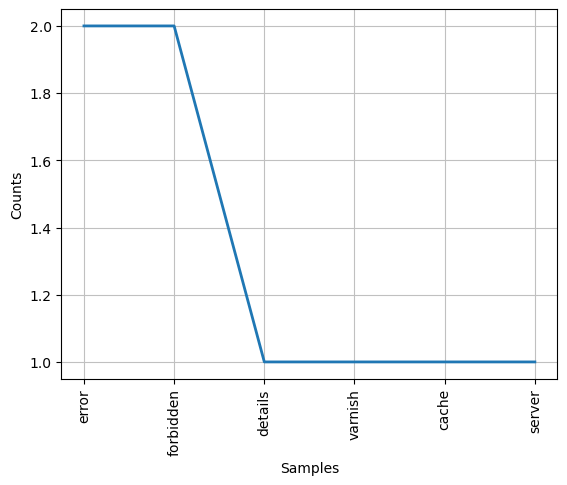

In [ ]:
#find the frequency of words
fdist = FreqDist(words_no_punc)

#print the 10 most common words
print(fdist.most_common(10))

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [ ]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sabaterj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 8


[('error', 2), ('forbidden', 2), ('details', 1), ('varnish', 1), ('cache', 1), ('server', 1)]


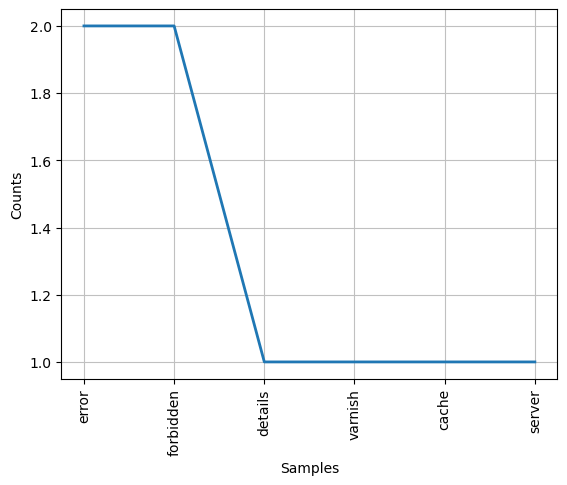

In [ ]:
#find the frequency of words
fdist = FreqDist(clean_words)
#print the 10 most common words
print(fdist.most_common(10))
#Plot the 10 most common words
fdist.plot(30)
plt.show()

In [ ]:
#Update the stopwords list
stopwords_list.extend(["said","one","like","came","back","help","arxiv","author","contact","subscribe","html","roff","ron","universiteit","university","france","belgium","université","bipo","nantes","abreu","caen","letters","antwerpen","united","kingdom","bristol","two","using"])

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

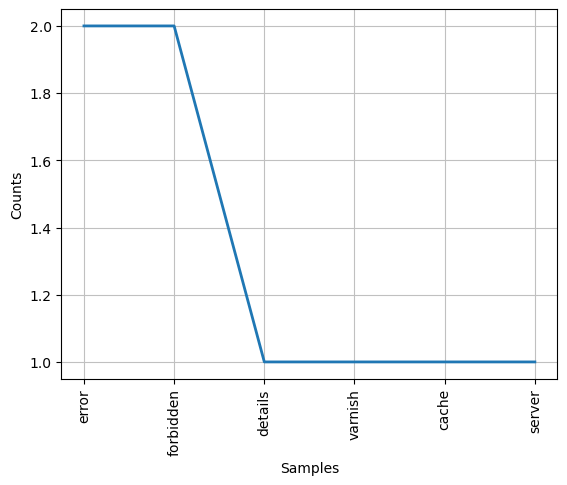

In [ ]:
#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(30)
plt.show()